<a href="https://colab.research.google.com/github/ivan890617/Cluster-practice/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans

In [ ]:
data = pd.read_csv('/content/sample_data/input/AEP_hourly.csv')
data.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [ ]:
def elbow_met(x):
  WCSS = []
  for i in range(1,11):
      model = KMeans(n_clusters = i,init = 'k-means++')
      model.fit(x)
      WCSS.append(model.inertia_)
  fig = plt.figure(figsize = (7,7))
  plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
  plt.xticks(np.arange(11))
  plt.xlabel("Number of clusters")
  plt.ylabel("WCSS")
  plt.show()


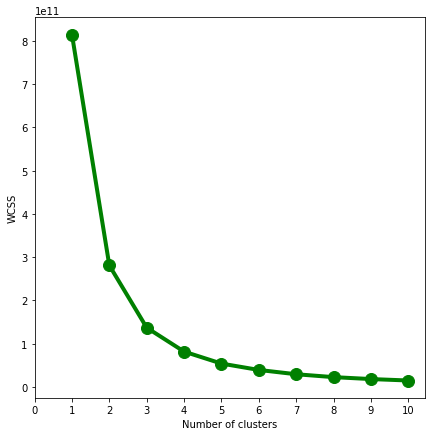

In [ ]:
x = pd.DataFrame(data,columns=['AEP_MW'])
elbow_met(x)

In [ ]:
def sorted_cluster(x, model=None):
    if model == None:
        model = KMeans()
    model = sorted_cluster_centers_(model, x)
    model = sorted_labels_(model, x)
    return model

def sorted_cluster_centers_(model, x):
    model.fit(x)
    new_centroids = []
    magnitude = []
    for center in model.cluster_centers_:
        magnitude.append(np.sqrt(center.dot(center)))
    idx_argsort = np.argsort(magnitude)
    model.cluster_centers_ = model.cluster_centers_[idx_argsort]
    return model

def sorted_labels_(sorted_model, x):
    sorted_model.labels_ = sorted_model.predict(x)
    return sorted_model

In [ ]:
df = pd.DataFrame(data,columns=['Datetime','AEP_MW'])


kmeans = KMeans(n_clusters=3)
cluster = sorted_cluster(df[['AEP_MW']], kmeans)
df['label'] = cluster.labels_
df['label'] = df['label']+1
#df['label'] = kmeans.fit_predict(df[['AEP_MW']])
#df = df[0:100]




In [ ]:
df

,Datetime,AEP_MW,label
0,2004-12-31 01:00:00,13478.0,1
1,2004-12-31 02:00:00,12865.0,1
2,2004-12-31 03:00:00,12577.0,1
3,2004-12-31 04:00:00,12517.0,1
4,2004-12-31 05:00:00,12670.0,1
...,...,...,...
121268,2018-01-01 20:00:00,21089.0,3
121269,2018-01-01 21:00:00,20999.0,3
121270,2018-01-01 22:00:00,20820.0,3
121271,2018-01-01 23:00:00,20415.0,3


<function matplotlib.pyplot.show>

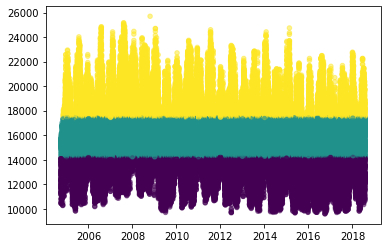

<Figure size 7200x7200 with 0 Axes>

In [ ]:
df['Datetime'] = [pd.to_datetime(d) for d in df['Datetime']]
plt.scatter(df['Datetime'],df['AEP_MW'], c= df['label'].astype(float), s=20, alpha=0.5)
plt.figure(figsize=(100,100))
plt.show

In [ ]:
#Level 1
filter_1 = (df['label'] == 1)
fil_1 = df.loc[filter_1]
b = pd.DataFrame(fil_1,columns=['AEP_MW'])
#elbow_met(b)

In [ ]:
#Level 2
filter_2 = (df['label'] == 2)
fil_2 = df.loc[filter_2]
a = pd.DataFrame(fil_2,columns=['AEP_MW'])
#elbow_met(a)

In [ ]:
#Level 3
filter_3 = (df['label'] == 3)
fil_3 = df.loc[filter_3]
c = pd.DataFrame(fil_3,columns=['AEP_MW'])
#elbow_met(c)

In [ ]:
fil_3

,Datetime,AEP_MW,label
66,2004-12-29 19:00:00,17738.0,3
67,2004-12-29 20:00:00,17468.0,3
72,2004-12-28 01:00:00,17580.0,3
77,2004-12-28 06:00:00,17908.0,3
78,2004-12-28 07:00:00,18944.0,3
...,...,...,...
121268,2018-01-01 20:00:00,21089.0,3
121269,2018-01-01 21:00:00,20999.0,3
121270,2018-01-01 22:00:00,20820.0,3
121271,2018-01-01 23:00:00,20415.0,3


In [ ]:
kmeans = KMeans(n_clusters=3)



cluster1 = sorted_cluster(fil_1[['AEP_MW']], kmeans)
fil_1['sub_label'] = cluster1.labels_
fil_1['sub_label'] = fil_1['sub_label']+1
fil_1['Datetime'] = [pd.to_datetime(d) for d in fil_1['Datetime']]


cluster2 = sorted_cluster(fil_2[['AEP_MW']], kmeans)
fil_2['sub_label'] = cluster2.labels_
fil_2['sub_label'] = fil_2['sub_label']+4
fil_2['Datetime'] = [pd.to_datetime(d) for d in fil_2['Datetime']]

cluster3 = sorted_cluster(fil_3[['AEP_MW']], kmeans)
fil_3['sub_label'] = cluster3.labels_
fil_3['sub_label'] = fil_3['sub_label']+7
fil_3['Datetime'] = [pd.to_datetime(d) for d in fil_3['Datetime']]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [ ]:
fil = fil_1.append(fil_2)
fil = fil.append(fil_3)
fil

,Datetime,AEP_MW,label,sub_label
0,2004-12-31 01:00:00,13478.0,1,3
1,2004-12-31 02:00:00,12865.0,1,2
2,2004-12-31 03:00:00,12577.0,1,2
3,2004-12-31 04:00:00,12517.0,1,2
4,2004-12-31 05:00:00,12670.0,1,2
...,...,...,...,...
121268,2018-01-01 20:00:00,21089.0,3,9
121269,2018-01-01 21:00:00,20999.0,3,9
121270,2018-01-01 22:00:00,20820.0,3,9
121271,2018-01-01 23:00:00,20415.0,3,8


In [ ]:
fil_sort = fil.sort_values(by='Datetime')
fil_sort

,Datetime,AEP_MW,label,sub_label
2183,2004-10-01 01:00:00,12379.0,1,2
2184,2004-10-01 02:00:00,11935.0,1,2
2185,2004-10-01 03:00:00,11692.0,1,1
2186,2004-10-01 04:00:00,11597.0,1,1
2187,2004-10-01 05:00:00,11681.0,1,1
...,...,...,...,...
116157,2018-08-02 20:00:00,17673.0,3,7
116158,2018-08-02 21:00:00,17303.0,2,6
116159,2018-08-02 22:00:00,17001.0,2,6
116160,2018-08-02 23:00:00,15964.0,2,5


<function matplotlib.pyplot.show>

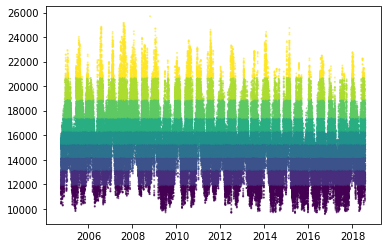

In [ ]:
plt.scatter(fil['Datetime'],fil['AEP_MW'], c= fil['sub_label'].astype(float), s=1, alpha=0.5)
plt.show

<function matplotlib.pyplot.show>

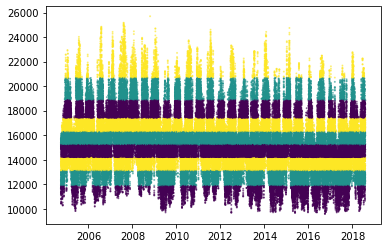

In [ ]:


plt.scatter(fil_1['Datetime'],fil_1['AEP_MW'], c= fil_1['sub_label'].astype(float), s=1, alpha=0.5)
plt.scatter(fil_2['Datetime'],fil_2['AEP_MW'], c= fil_2['sub_label'].astype(float), s=1, alpha=0.5)
plt.scatter(fil_3['Datetime'],fil_3['AEP_MW'], c= fil_3['sub_label'].astype(float), s=1, alpha=0.5)
plt.show

In [ ]:
fil_sort.to_csv('/content/sample_data/output/result.csv')
